### Imports

In [87]:
# !pip3 install ipywidgets
# !pip3 install matplotlib

In [13]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import random as rd

# Deep Learning

### Preparation

In [3]:
#------------------------------------------

def preparePlot(x, y, t):
    
    fig, ax = plt.subplots()
    ax.set(xlim=[min(x) - 1, max(x) + 1], ylim=[min(y) - 1, max(y) + 1], xlabel='x', ylabel='y', title=t)

#------------------------------------------

def plotCurve(x, y, color):

    plt.plot(x, y, color)
        
#------------------------------------------

def showPlot():
    
    plt.show()

#------------------------------------------

In [4]:
x = [x for x in range(-100, 100, 1)]

print(x)

[-100, -99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [5]:
# Prepare random data
yEdge = [0 if 10 <= x else 1 for x in x]

print(yEdge)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


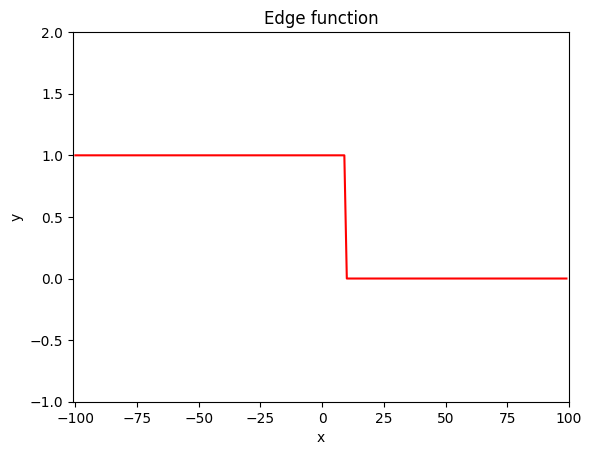

In [6]:
preparePlot(x, yEdge, "Edge function")
plotCurve(x, yEdge, 'red')
showPlot()

## Doel: range detector maken

### ReLU: Rectified Linear Unit

In [7]:
#------------------------------------------

def relu(w, b, x):
    
    y = w * x + b
    
    if y > 0:
        
        
        return y
    
    else:
        
        return 0

#------------------------------------------

### Handmatige edge bepalen

In [23]:
#------------------------------------------

def mse(fit):
    
    sse = 0
    
    # Sum of squared errors
    for i in range(0, len(yEdge)):
        
        # Error = actual - predicted
        err = yEdge[i] - fit[i]
        sse += (err**2)
    
    # Mean squared error
    return sse / len(yEdge)

#------------------------------------------

def rangeFit(w1, b1, w2, b2):
    
    fit = [relu(w2, b2, relu(w1, b1, x)) for x in x]
    
    preparePlot(x, fit, "Edge detector")
    
    plotCurve(x, fit, 'red')
    
    showPlot()
    
    # Our indicator
    # print(mse(fit))

#------------------------------------------

# w1 = 1, b1 = -10, w2 = -1, b2 = 1
interact(rangeFit, w1=(-1,1,0.01), b1=(-10,10,0.01), w2=(-1,1,0.01), b2=(-30,30,0.01))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w1', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

<function __main__.rangeFit(w1, b1, w2, b2)>

### Gradient descent met back propagation

initial cost:  2636972.7699006046
w1Fit:  0.021114934340417255 b1Fit:  14.15021582994412 w2Fit:  -0.4559446072375752 b2Fit:  6.993332974101565
final cost:  0.06741473817743185


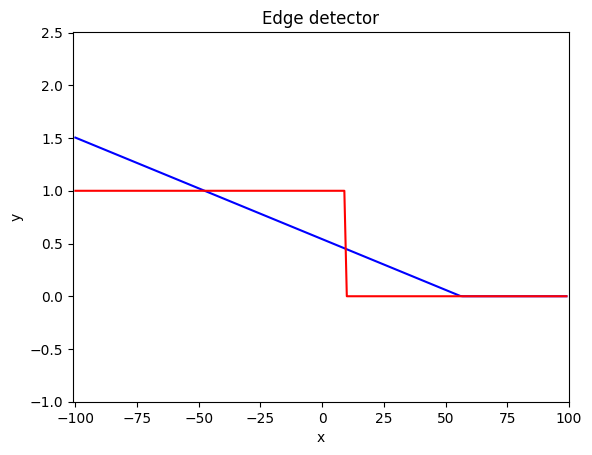

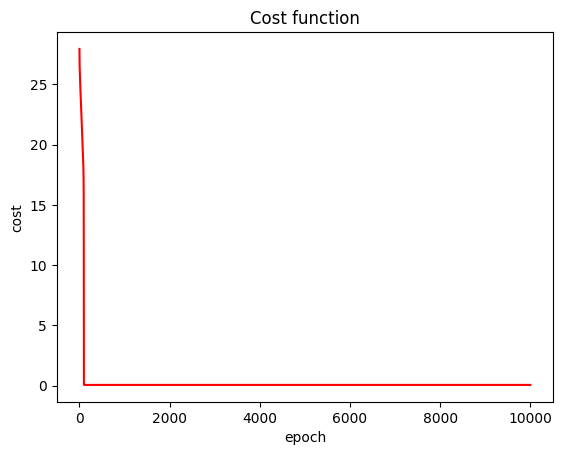

In [44]:
#------------------------------------------

# Learning iterations
epochs = 10000

# Learning rate
learningRate = 1e-5

#------------------------------------------

# rd.seed(42)

# Initial values ("guess")
w1Fit = rd.gauss(0, 10)
b1Fit = rd.gauss(0, 10)
w2Fit = rd.gauss(0, 10)
b2Fit = rd.gauss(0, 10)

# Epochs counter
epoch = 0

#------------------------------------------

def cost(w1, b1, w2, b2):
    
    sse = 0
    
    # Sum of squared errors
    for i in range(0, len(yEdge)):
        
        # Use yhat = ReLU(w2 * ReLU(w1 * x + b1) + b2)
        yhat = relu(w2, b2, relu(w1, b1, x[i]))
        
        # Use error = y - yhat
        err = yEdge[i] - yhat
        
        sse += (err**2)
    
    # Mean squared error
    return sse / len(yEdge)

#------------------------------------------

def backPropagation(w1, b1, w2, b2):
    
    # Stochastic gradient descent
    for i in range(0, len(yEdge)):
        
        # Write out the components
        a1 = relu(w1, b1, x[i])
        a2 = relu(w2, b2, a1)
        
        # Use error = y - a2
        delta2 = -2 * (yEdge[i] - a2)

        # Backpropagation steps
        dw2 = delta2 * a1
        db2 = delta2
        
        dw1 = delta2 * w2 * x[i]
        db1 = delta2 * w2
        
        # Adjust with learn rate
        w2 -= learningRate * dw2
        b2 -= learningRate * db2
        
        w1 -= learningRate * dw1
        b1 -= learningRate * db1
    
    return w1, b1, w2, b2

#------------------------------------------

def plotFit(w1, b1, w2, b2):
    
    fit = [relu(w2, b2, relu(w1, b1, x)) for x in x]
    
    preparePlot(x, fit, "Edge detector")
    
    plotCurve(x, fit, 'blue')
    plotCurve(x, yEdge, 'red')
    
    showPlot()

#------------------------------------------

# Inital cost
mse = cost(w1Fit, b1Fit, w2Fit, b2Fit)

print("initial cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit))

#------------------------------------------

epochList = []
costList = []

while epoch < epochs:
    
    # print("epoch: ", epoch)
    
    epochList.append(epoch)
    
    w1Fit, b1Fit, w2Fit, b2Fit = backPropagation(w1Fit, b1Fit, w2Fit, b2Fit)
    
    # print("cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit))
    
    costList.append(cost(w1Fit, b1Fit, w2Fit, b2Fit))
    
    epoch += 1
    
#------------------------------------------

print("w1Fit: ", w1Fit, "b1Fit: ", b1Fit, "w2Fit: ", w2Fit, "b2Fit: ", b2Fit)
print("final cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit))

plotFit(w1Fit, b1Fit, w2Fit, b2Fit)


fig, ax = plt.subplots()
ax.set(xlabel='epoch', ylabel='cost', title="Cost function")

plt.plot(epochList, costList, 'red')
plt.show()